**Name: Savona Shrestha**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Regression/vehicle.csv')
df

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


# 3.2. Regression
1. When and Who created the dataset?

 The dataset was created a year ago by Nehal Birla, Nishant Verma and Nikhil Kushawa.
2. How did you get acess to the dataset?

 The dataset was originated from Kaggle Datasets
3. List out the attributes (columns) of a dataset.

 •	Car_Name: Name of the car

 •	Year: Year of manufacture
  
 •	Present_Price: The current price of the car in lakhs

 •	Kms_Driven: Total kilometers driven

 •	Fuel_Type: Type of fuel the car uses

 •	Seller_Type: Type of seller

 •	Transmission: Type of transmission

 •	Owner: umber of owners the car has had

 •	Selling_Price: Selling price of the car in lakhs


## 3.2.1. Load: Inspect and Explore your Data:
Understanding the characteristics of Data beforehand allow us to build a better model with acceptable performance. Before you begin the quest of building, training and testing of model, You must write some code in chunks to check, preview, summarize, explore and visualize your data.
1. Load and Check the dataset: After loading the data, it is a good practise to run some checks on it. You must perform the following:

(a) Data Cleaning and find the summary statistics of the data.

(b) Explore the data with Visualization and chart.

In [ ]:
#total size and shape of the Dataframe
total_size = df.size
total_shape = df.shape
print("Total Size of the Data Frame:", total_size)
print("Shape of the Data Frame:", total_shape)

Total Size of the Data Frame: 2709
Shape of the Data Frame: (301, 9)


In [ ]:
#descriptive statistics
df.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


In [ ]:
#information of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#counts missing values in each column
df.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [ ]:
#print the count of duplicated rows
print('Duplicated :',df.duplicated().sum())

Duplicated : 2


In [ ]:
#remove duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
#duplicated rows after removing
print('Duplicated :',df.duplicated().sum())

Duplicated : 0


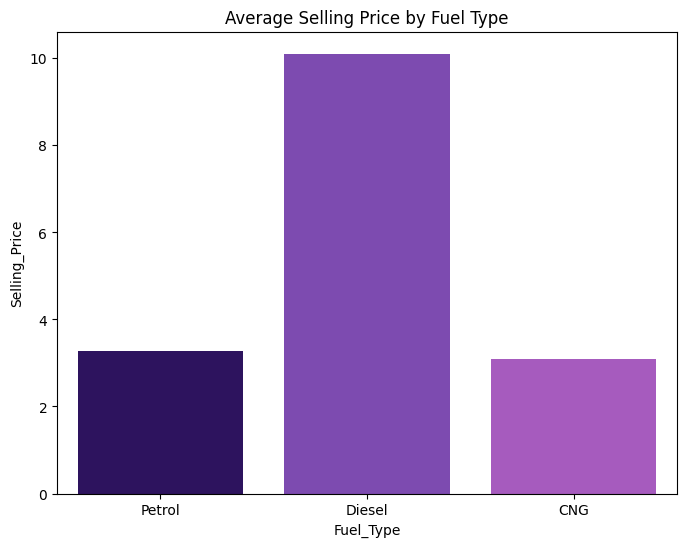

In [ ]:
plt.figure(figsize=(8, 6))
#create barplot od Average selling price of fuel type
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price', hue = 'Fuel_Type', palette = ['#29066B','#7D3AC1','#AF4BCE'], errorbar=None)
plt.title('Average Selling Price by Fuel Type')
plt.show()

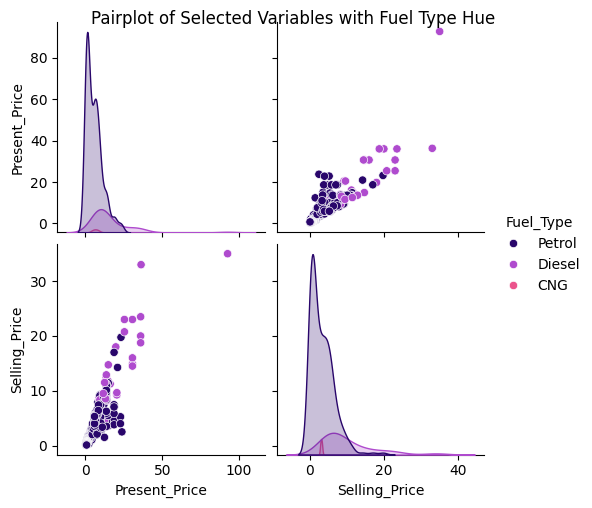

In [ ]:
selected_variables = ['Present_Price', 'Selling_Price', 'Fuel_Type']
#create pair plot with specified variables
sns.pairplot(df[selected_variables], hue='Fuel_Type', palette = ['#29066B','#AF4BCE','#EB548C'])
plt.suptitle('Pairplot of Selected Variables with Fuel Type Hue', y=1)
plt.show()

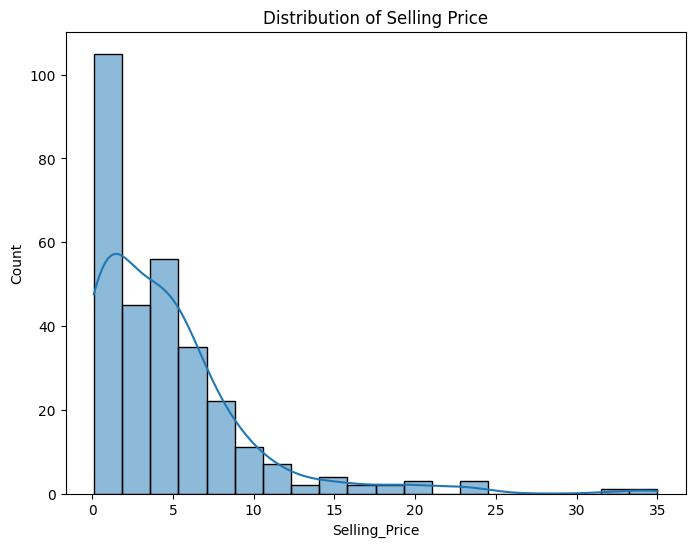

In [ ]:
plt.figure(figsize=(8, 6))
#create histogram of Selling Price
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

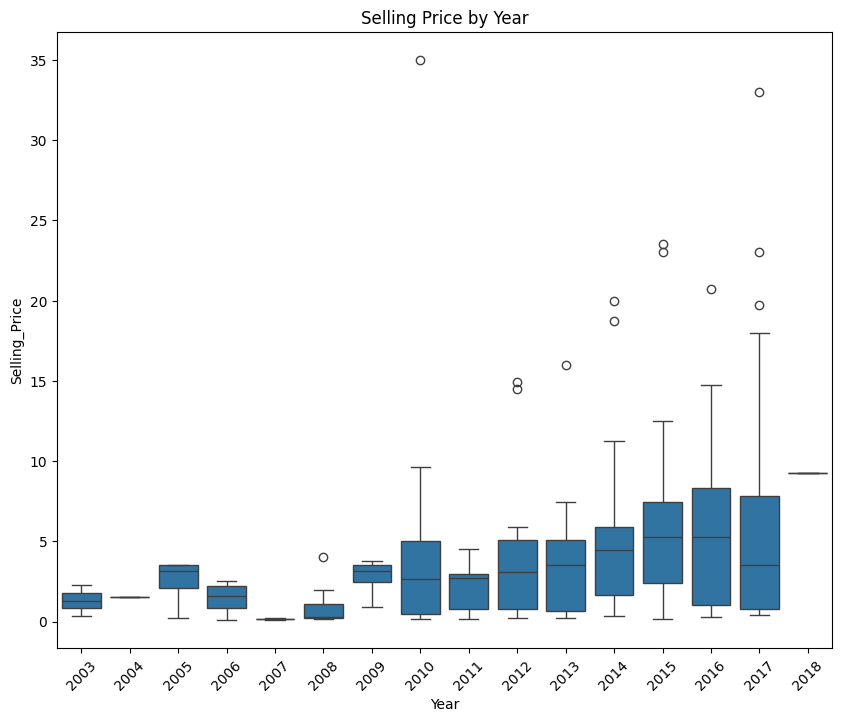

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Year', y='Selling_Price')
plt.xticks(rotation=45)
plt.title('Selling Price by Year')
plt.show()

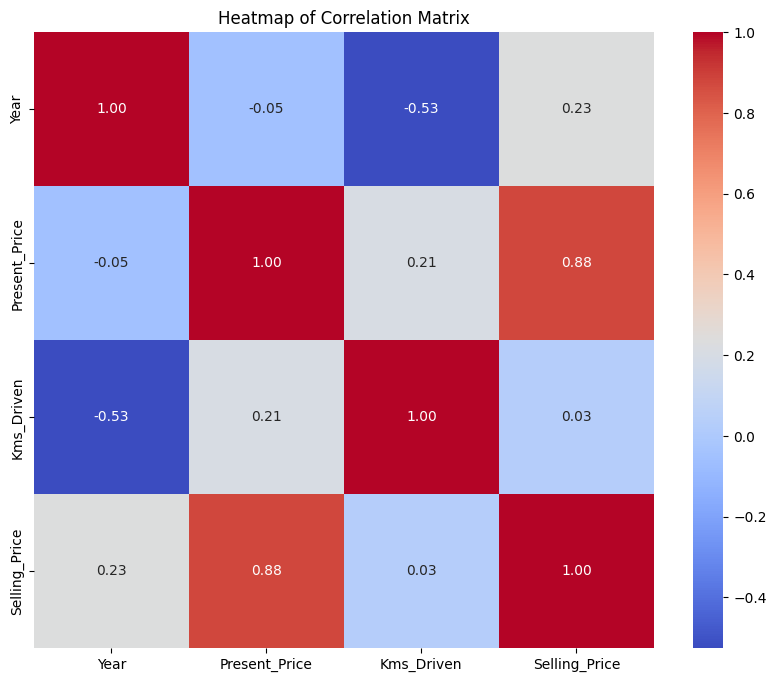

In [ ]:
#calculate the correlation matrix
selected_variables = ['Year', 'Present_Price', 'Kms_Driven', 'Selling_Price']
corr_matrix = df[selected_variables].corr()

plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

## 3.2.2. Build Primary Model
Once you have assembled your dataset and gained insights into the key characteristics of your data, it’s time
to Build; Train; and Evaluate your model. For this task you must do the following:
1. Split the Dataset into Train and Test set.
2. Built at least two machine learning model for Regression Task.
3. Evaluate both model on Test Dataset.
4. Conclude: Which Model best performed in your dataset?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#create dummy variables for categorical features
dmcf = pd.get_dummies(df[["Fuel_Type", "Transmission"]]).astype("float64")

#select numerical columns
numeric_cols = df[["Year", "Present_Price", "Kms_Driven"]]

#target variable
y = df["Selling_Price"]

#dummy variables and numerical columns
X = pd.concat([dmcf, numeric_cols], axis=1)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
#create a pipeline with StandardScaler and RandomForestRegressor
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

#pipeline on the training data
pipe.fit(X_train, y_train)

#make predictions
y_pred = pipe.predict(X_test)

#calculate mean squared error and R-squared
rmse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("RandomForestRegressor RMSE (root mean squared error):", np.sqrt(rmse_rf))
print("RandomForestRegressor R-squared score:", r2_rf)

RandomForestRegressor RMSE (root mean squared error): 6.40821391608375
RandomForestRegressor R-squared score: -0.5933258754835544


In [ ]:
#create a pipeline with StandardScaler and RandomForestRegressor
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

#pipeline on the training data
pipe.fit(X_train, y_train)

#make predictions on the test set
y_pred = pipe.predict(X_test)

#calculate mean squared error and R-squared
rmse_li = mean_squared_error(y_test, y_pred)
r2_li = r2_score(y_test, y_pred)

print("Linear Regression MSE (root mean squared error):", np.sqrt(rmse_li))
print("Linear Regression R-squared score:", r2_li)


Linear Regression MSE (root mean squared error): 6.438569045862636
Linear Regression R-squared score: -0.6084565081791242


In [ ]:
#determine which model performed better
best_model = "RandomForestRegressor" if rmse_rf < rmse_li and r2_rf > r2_li else "LinearRegression"
print("Best performing model: ", best_model)

Best performing model:  RandomForestRegressor


## 3.2.3. Hyper-parameter Optimization with Cross-Validation
Hyper-parameter optimization (aka Hyper-parameter Tuning) is the process of finding the best hyperparameters value for your selected model. In this step you must perform the following:
1. Identify the various hyper-parameters of the model you used in section 3.1.2 {For both the model}.
2. Used any cross-validation techniques to find the best value of hyper-parameters selected above. {Hint:
You can use grid searchCV or randomized searchCV.}
3. Conclude: The best Hyper-parameters for both the model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
#define the Linear Regression model
linear_model = LinearRegression()

#define the hyperparameter search space
param_dist = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
     'n_jobs': [ i for i in range(1,10)]
}

#perform random search
random_search = RandomizedSearchCV(linear_model, param_distributions=param_dist, n_iter=5, cv=5, random_state=42, verbose=0)
random_search.fit(X_train, y_train)

#print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

#evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
score = best_model.score(X_test, y_test)
print("R^2 Score on Test Set:", score)

Best Hyperparameters: {'n_jobs': 1, 'fit_intercept': True}
R^2 Score on Test Set: -0.6084565081791269


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import randint

#define the RandomForestRegressor model
rf_model = RandomForestRegressor()

#define the hyperparameter search space
param_dist = {
    'n_estimators': randint(10, 200),          # Number of trees in the forest
    'max_depth': randint(1, 20),               # Maximum depth of the tree
    'min_samples_split': randint(2, 20),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),        # Minimum number of samples required to be at a leaf node
}

#perform random search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, verbose=0)
random_search.fit(X_train, y_train)

#print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

#evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
score = best_model.score(X_test, y_test)
print("R^2 Score on Test Set:", score)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 159}
R^2 Score on Test Set: -0.08696425578735245


## 3.2.4. Feature Selection
In this section you must any one of the feature selection technique to select
and identify the best features.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#SelectKBest to select all features using f_regression
fs = SelectKBest(score_func=f_regression, k='all')

#relationship from training data
fs.fit(X_train, y_train)

#transform train and test input data
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

#names of the selected features
selected_feature_names = fs.get_feature_names_out()

#print the names of the selected features
print("Selected Feature Names:", selected_feature_names)

#create a Linear Regression model
linear_model = LinearRegression()

#fit the model on the transformed training data
linear_model.fit(X_train_fs, y_train)

#evaluate the model on the transformed test data
score = linear_model.score(X_test_fs, y_test)
print("R^2 Score on Test Set with Selected Features:", score)

Selected Feature Names: ['Fuel_Type_CNG' 'Fuel_Type_Diesel' 'Fuel_Type_Petrol'
 'Transmission_Automatic' 'Transmission_Manual' 'Year' 'Present_Price'
 'Kms_Driven']
R^2 Score on Test Set with Selected Features: 0.7683383528065288


Feature 0: 0.108506
Feature 1: 91.592994
Feature 2: 87.853799
Feature 3: 46.189511
Feature 4: 46.189511
Feature 5: 11.437339
Feature 6: 1030.369746
Feature 7: 4.556731


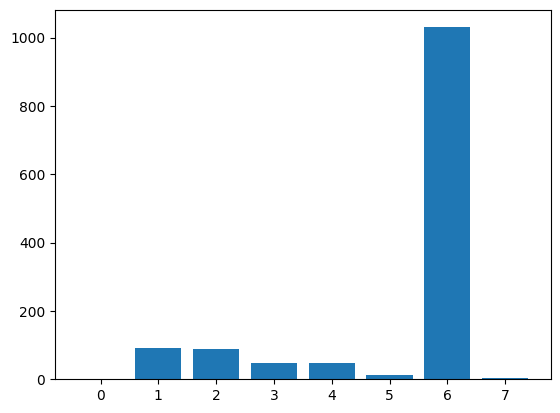

In [ ]:
from matplotlib import pyplot
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
#plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## 3.2.5. Final Model
With the best Hyper-parameters from section 3.2.3. and selected features from 3.2.4. rebuild both the model
from section 3.2.2.


In [ ]:
X=X.loc[:,['Year','Kms_Driven']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#make predictions on the test set
rf_predictions = rf_model.predict(X_test)

#evaluate the model using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("R^2 ScoreE:", r2_score(y_test,rf_predictions))
print("Model MSE (root mean squared error):", np.sqrt(rf_mse))

R^2 ScoreE: -0.6823274267033239
Model MSE (root mean squared error): 6.584760125628048


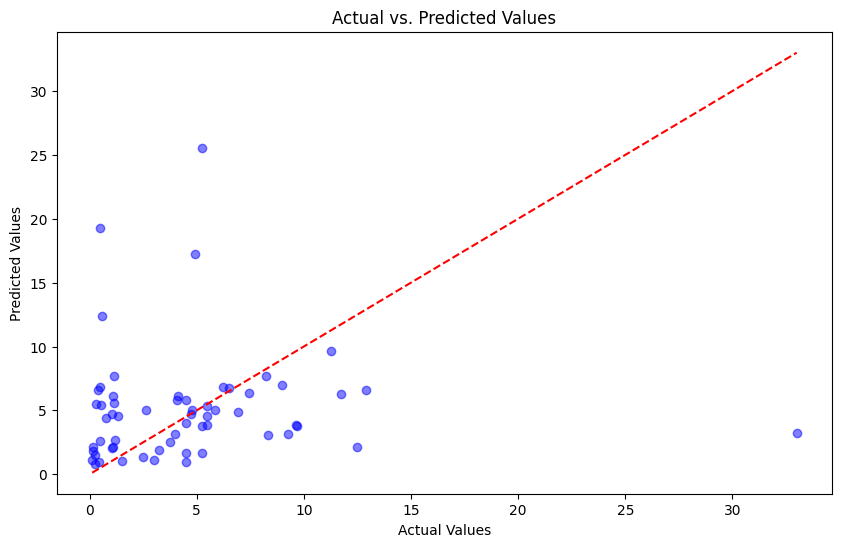

In [ ]:
#create a scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()